## 부산 5대 범죄 관할구별 발생 시각화

In [10]:
# 라이브러리 import
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
# 한글 깨짐 문제 해결

from matplotlib import rcParams, font_manager, rc

font_path = 'C:/Windows/Fonts/NanumGothicCoding.ttf'
font = font_manager.FontProperties(fname=font_path).get_name()  
rc('font', family=font)
rcParams['axes.unicode_minus'] = False

In [12]:
sns.set(font='NanumGothicCoding', rc={'axes.unicode_minus':False}, style='darkgrid')

### 연도별 5대 범죄 시각화

##### 데이터 불러오기 & 전처리

In [13]:
bsCrime18 = pd.read_csv('./data/18_BusanCrime.csv', encoding='utf-8')
bsCrime18.rename(columns={'성범죄': '성범죄', '경찰서': '관서명'}, inplace=True)    #inplace: 덮어쓰기 여부
bsCrime18['연도'] = 2018

bsCrime19 = pd.read_csv('./data/19_BusanCrime.csv', encoding='utf-8')
bsCrime19.rename(columns={'성범죄': '성범죄', '경찰서': '관서명'}, inplace=True)    
bsCrime19['연도'] = 2019

bsCrime20 = pd.read_csv('./data/20_BusanCrime.csv', encoding='utf-8')
bsCrime20.rename(columns={'성범죄': '성범죄', '경찰서': '관서명'}, inplace=True) 
bsCrime20['연도'] = 2020

bsCrime21 = pd.read_csv('./data/21_BusanCrime.csv', encoding='utf-8')
bsCrime21.rename(columns={'성범죄': '성범죄', '경찰서': '관서명'}, inplace=True)  
bsCrime21['연도'] = 2021

df4y = pd.concat([bsCrime18, bsCrime19, bsCrime20, bsCrime21], axis=0, ignore_index=True)

df4y['합계'] = df4y['살인'] + df4y['강도'] + df4y['성범죄'] + df4y['절도'] + df4y['폭력']
df4y = df4y.drop(columns=['구분', '연번'])
df4y.head()

,관서명,살인,강도,성범죄,절도,폭력,연도,합계
0,중부,1,2,47,954,784,2018,1788
1,동래,3,6,89,1078,1375,2018,2551
2,영도,4,2,43,329,666,2018,1044
3,동부,0,5,63,576,823,2018,1467
4,부산진,1,17,321,2376,3253,2018,5968


In [14]:
# 연도 및 관할서별 5대 범죄 횟수 그룹화
pd.pivot_table(df4y, index=['연도', '관서명'], aggfunc='sum').head()

강도  살인  성범죄    절도    폭력    합계
연도   관서명                               
2018 강서    1   2   46   501   499  1049
     금정    7   4   87   595   936  1629
     기장    2   3   38   415   772  1230
     남부   10   8  185  1458  2091  3752
     동래    6   3   89  1078  1375  2551

In [17]:
# 연도별 총 5대 범죄 횟수
byYear = pd.pivot_table(df4y, index=['연도'], aggfunc='sum', margins=True).reset_index()
byYear = byYear.drop(columns=['관서명'])
byYear

C:\Users\Administrator\AppData\Local\Temp\ipykernel_6548\3841623892.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '중부동래영도동부부산진서부남부해운대사상금정사하연제강서북부기장중부동래영도동부부산진서부남부해운대사상금정사하연제강서북부기장중부동래영도동부부산진서부남부해운대사상금정사하연제강서북부기장중부동래영도동부부산진서부남부해운대사상금정사하연제강서북부기장' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  byYear = pd.pivot_table(df4y, index=['연도'], aggfunc='sum', margins=True).reset_index()


,연도,강도,살인,성범죄,절도,폭력,합계
0,2018,91,53,1533,14261,19503,35441
1,2019,82,63,1470,14491,20649,36755
2,2020,39,51,1416,14169,19056,34731
3,2021,51,46,1338,12670,16094,30199
4,All,263,213,5757,55591,75302,137126


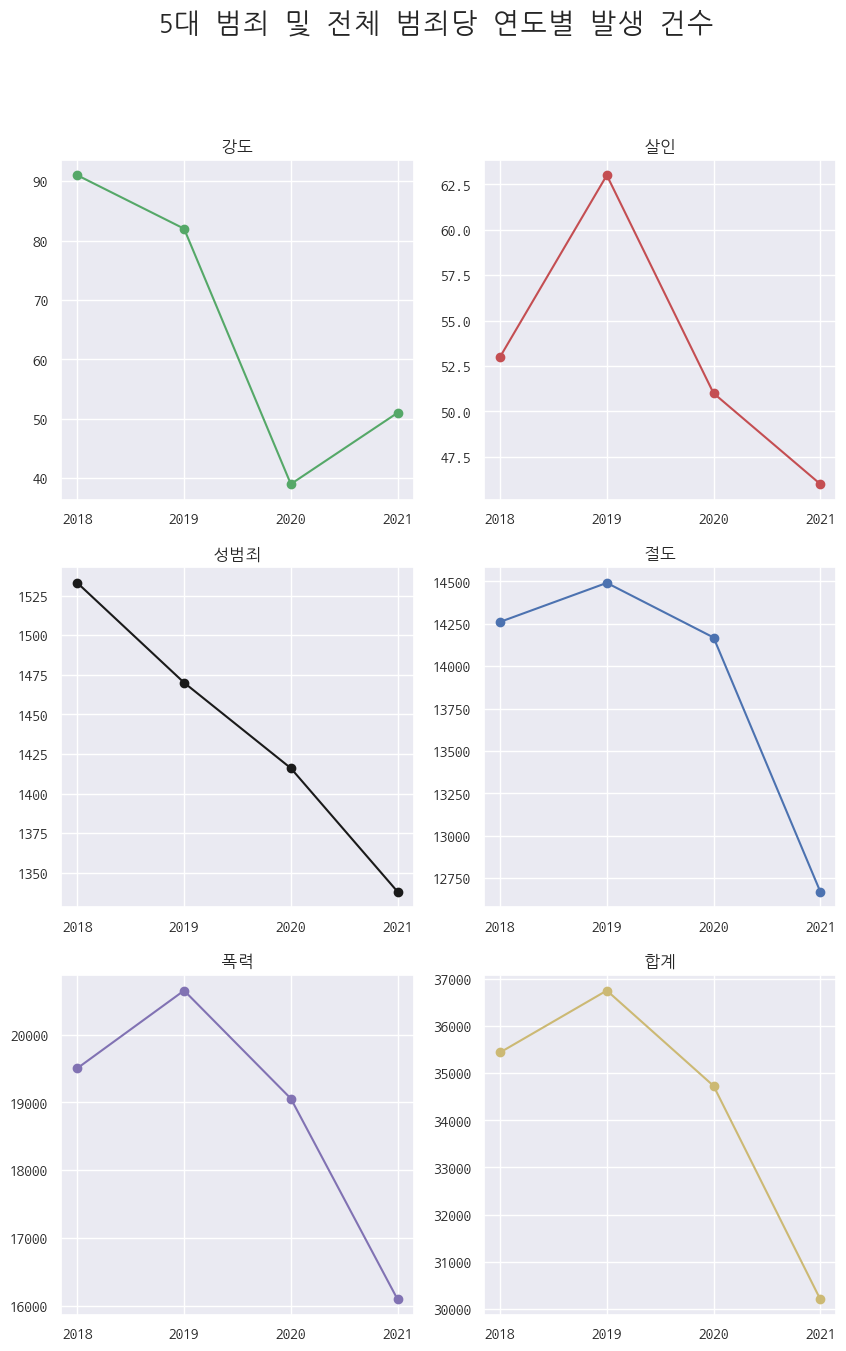

In [24]:
# 연도별 5대 범죄 시각화
x = ['2018', '2019', '2020', '2021']
colorList = ['go-', 'ro-', 'ko-', 'bo-', 'mo-', 'yo-']
col = byYear.columns
fig, axes = plt.subplots(3, 2, figsize=(10, 15))
ax = axes.flatten()

for i in range(6):
    ax[i].plot(x, byYear[col[i+1]].iloc[:4], colorList[i])
    ax[i].set_title(col[i+1])
fig.suptitle('5대 범죄 및 전체 범죄당 연도별 발생 건수', fontsize=20)
plt.show()

### 관서별 5대 범죄 시각화

In [25]:
# 관서별 5대 범죄 4개년 총계
byDistrict4y = df4y.groupby(['관서명']).sum().drop(columns=['연도', '합계'])
byDistrict4y.head()

,살인,강도,성범죄,절도,폭력
관서명,,,,,
강서,6,7,156,1774,2078
금정,21,22,320,3352,3896
기장,5,4,178,1993,2926
남부,27,25,646,5538,7919
동래,14,15,380,3956,5292


In [29]:
# sklearn의 MinMaxScaler를 통해 각 항목의 최댓값을 1, 최솟값을 0으로 설정해 관서별 범죄 발생율의 상대적 위치 확인
# 1에 해당하는 곳이 가장 많이 발생한 곳, 0이 제일 적게 발생한 곳을 의미
col = byDistrict4y.columns
x = byDistrict4y[col].values
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x.astype(float))
criNor = pd.DataFrame(x_scaled, columns=col, index=byDistrict4y.index)
criNor.head()

,살인,강도,성범죄,절도,폭력
관서명,,,,,
강서,0.086957,0.069767,0.027593,0.054088,0.000000
금정,0.739130,0.418605,0.183635,0.252579,0.177210
기장,0.043478,0.000000,0.048525,0.081635,0.082659
남부,1.000000,0.488372,0.493815,0.527547,0.569354
동래,0.434783,0.255814,0.240723,0.328553,0.313286


<Axes: xlabel='관서명'>

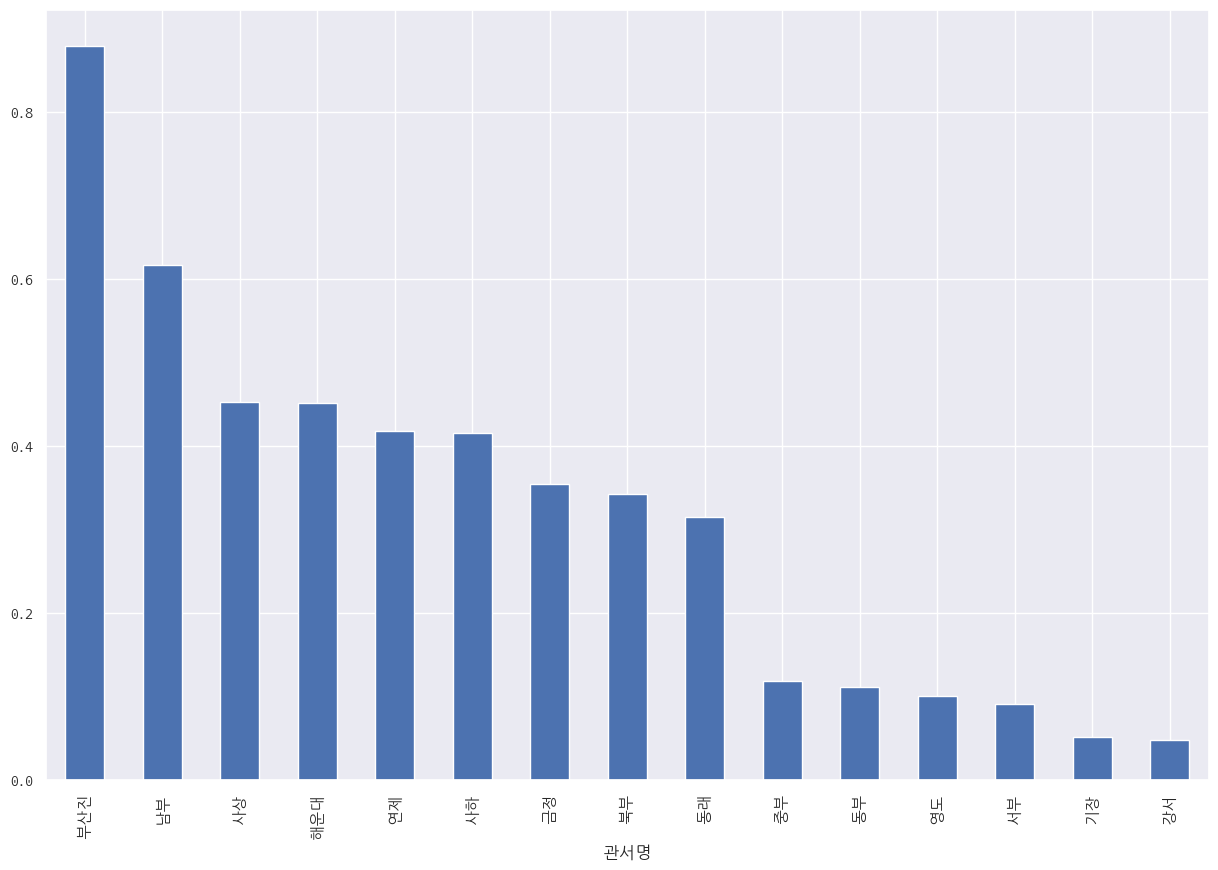

In [30]:
# 범죄별 상대적 위치를 평균화하여 막대 그래프로 비교
criNor['평균'] = np.sum(criNor[col], axis=1) / 5
criSort = criNor.sort_values('평균', ascending=False)
criSort = criSort.iloc[:,5]
criSort.plot.bar(figsize =(15, 10))

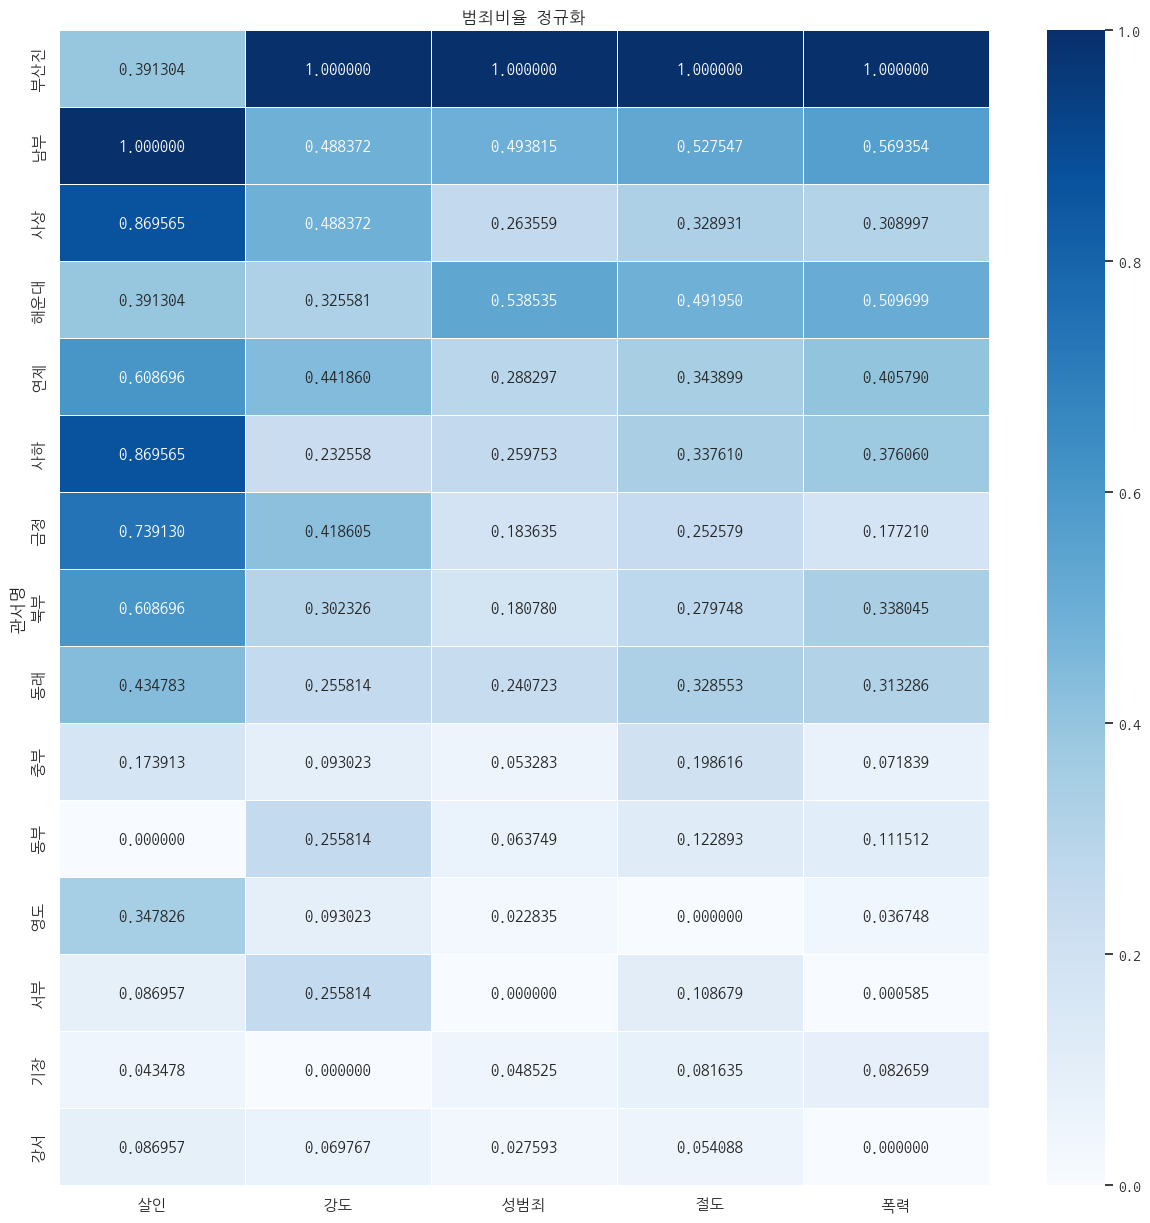

In [34]:
# 히트맵으로 MinMaxScaler된 값 표현
crimeNormSort = criNor.sort_values(by='평균', ascending=False)
plt.figure(figsize=(15, 15))
sns.heatmap(crimeNormSort[col], annot=True, fmt='f', linewidths=.5, cmap='Blues')
plt.title('범죄비율 정규화')
plt.show()

### 행정구역별 인구 만 명 당 5대 범죄 시각화

In [35]:
# 만 명 당 범죄 횟수 구해 인구 대비 범죄율 확인
# 수영구의 인구를 5개 동으로 나눠서 관할인 연제구와 남구에 비중대로 배분

# 관할구 컬럼 배정
byDistrict4y['관할구'] = ['강서구', '금정구', '기장군', '남구', '동래구', '동구', '부산진구', '북구', '사상구', '사하구', '서구', '연제구', '영도구', '중구', '해운대구']
byDistrict4y.head()

,살인,강도,성범죄,절도,폭력,관할구
관서명,,,,,,
강서,6,7,156,1774,2078,강서구
금정,21,22,320,3352,3896,금정구
기장,5,4,178,1993,2926,기장군
남부,27,25,646,5538,7919,남구
동래,14,15,380,3956,5292,동래구


In [ ]:
# 행정구역별 인구수 데이터 불러옴
popDf = pd.read